In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import imageio
import tifffile as tiff 
import pickle
from pathlib import Path
from skimage import io

from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

import re


In [37]:
def result_csv_to_table(table_path,start,crop):
    table_name = table_path.stem
    df_deep = pd.read_csv(table_path)
    df_length = df_deep.shape[1]
    crop_dict = {0:(0,0),1:(0,520),2:(704,0),3:(704,520)}
    df_d = df_deep.drop(columns = 'Unnamed: 0').fillna("A")
    # re.findall("\d+\.\d+",x)
    numeric_const_pattern = '[-+]? (?: (?: \d* \. \d+ ) | (?: \d+ \.? ) )(?: [Ee] [+-]? \d+ ) ?'
    rx = re.compile(numeric_const_pattern, re.VERBOSE)
    df_d = df_d.applymap(lambda x: [float(i) for i in rx.findall(x)])
    df_d = df_d.applymap(lambda y: np.nan if len(y)<2 else y)
    for i in range(df_length):
        if i%2 == 1:
            real_idx = (i+start)*2 + 1
        else:
            real_idx = (i+start+1)
        df_d.rename(columns = {f'{i}':real_idx},inplace=True)
    df_u = df_d.unstack().reset_index()
    df_u.dropna(inplace=True)
    # TODO Add crop data
    if table_name =='centroids':
        x_add, y_add = crop_dict[crop]
        df_u['X'] = df_u[0].map(lambda x :x_add + x[1])
        df_u['Y'] = df_u[0].map(lambda x : y_add + x[0])
    elif table_name == 'embeddings':
        df_u['Embeddings'] = df_u[0]
    elif table_name == 'morphologies':
        df_u['Area'] = df_u[0].map(lambda x : x[0])
        df_u['Major Axis'] = df_u[0].map(lambda x : x[1])
        df_u['Minor Axis'] = df_u[0].map(lambda x : x[2])
    else:
        return
    df_f = df_u.rename(columns={'level_0':'Time','level_1':'ID'}).drop(columns=0)  
    return df_f

In [38]:
def folder_result_to_one_table(res_path:Path):
    res_name = res_path.stem
    res_well = res_name.split('_')[1]
    res_view = res_name.split('_')[2]
    res_start = int(res_name.split('start_')[1][0])
    res_crop = int(res_name.split('crop_')[1][0])
    df = pd.DataFrame()
    for res_csv in res_path.glob('*.csv'):
        df_res = result_csv_to_table(res_csv,res_start,res_crop)
        if df_res is None:
            continue
        df_res = df_res.set_index(['Time','ID'])
        df = pd.concat([df_res,df], axis=1)
    df['well'] = res_well
    df['view'] = res_view
    return df



In [39]:
def result_to_track(res_path):
    df = pd.read_csv(res_path)


In [40]:
all_res_path = Path(r'C:\Projects\TAU\DL-Workshop\Images_Ilan\JH0011\Results\Tracking\Results-20220831T065654Z-001\Results')
for res_folder in all_res_path.glob('*'):
    print(res_folder)
    folder_result_to_one_table(res_folder).to_csv(res_folder.joinpath('res_all_features.csv'))
    break

C:\Projects\TAU\DL-Workshop\Images_Ilan\JH0011\Results\Tracking\Results-20220831T065654Z-001\Results\Results_D2_2_start_2_crop_0_2022-08-29_18-52-37
0        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
722      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
723      [0.0, 0.43313393, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
                               ...                        
33115    [0.0, 0.7247404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
33116    [0.0, 0.84993523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
33117    [0.0, 1.2979858, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
33118    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
33119    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: 0, Length: 10840, dtype: object
0


TypeError: eval() arg 1 must be a string, bytes or code object

In [54]:
df = pd.read_csv(r'C:\Projects\TAU\DL-Workshop\Images_Ilan\JH0011\Results\Tracking\Results-20220831T065654Z-001\Results\Results_D2_2_start_2_crop_0_2022-08-29_18-52-37\res_all_features.csv')
df

,Time,ID,Area,Major Axis,Minor Axis,Embediings,X,Y,well,view
0,3,0,148.0,14.649363,12.896321,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",75.898650,37.141890,D2,2
1,3,1,178.0,17.950172,12.644963,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",107.500000,42.151684,D2,2
2,3,2,204.0,18.244291,14.413010,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",61.019608,168.647060,D2,2
3,7,2,136.0,15.151068,11.425120,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",62.889706,170.566180,D2,2
4,7,3,96.0,11.626000,10.807790,"[0.0, 0.43313393, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",63.583332,4.125000,D2,2
...,...,...,...,...,...,...,...,...,...,...
10835,95,715,94.0,13.915342,8.614274,"[0.0, 0.7247404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",53.297870,451.148930,D2,2
10836,95,716,87.0,13.729756,8.121001,"[0.0, 0.84993523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",549.988500,468.689670,D2,2
10837,95,717,98.0,18.735302,7.047684,"[0.0, 1.2979858, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.387755,495.969400,D2,2
10838,95,718,189.0,17.126078,14.104162,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",696.783100,170.941800,D2,2


In [49]:
# df['Embediings'] = df['Embediings'].map(lambda x : np.array(eval(x)))

In [66]:
df['morpho_kinetic'] = str(df.drop(columns=['ID','Time','well','view','Embediings']).values.tolist())

In [67]:
df

,Time,ID,Area,Major Axis,Minor Axis,Embediings,X,Y,well,view,morpho_kinetic
0,3,0,148.0,14.649363,12.896321,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",75.898650,37.141890,D2,2,"[[148.0, 14.649363, 12.896321, 75.89865, 37.14..."
1,3,1,178.0,17.950172,12.644963,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",107.500000,42.151684,D2,2,"[[148.0, 14.649363, 12.896321, 75.89865, 37.14..."
2,3,2,204.0,18.244291,14.413010,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",61.019608,168.647060,D2,2,"[[148.0, 14.649363, 12.896321, 75.89865, 37.14..."
3,7,2,136.0,15.151068,11.425120,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",62.889706,170.566180,D2,2,"[[148.0, 14.649363, 12.896321, 75.89865, 37.14..."
4,7,3,96.0,11.626000,10.807790,"[0.0, 0.43313393, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",63.583332,4.125000,D2,2,"[[148.0, 14.649363, 12.896321, 75.89865, 37.14..."
...,...,...,...,...,...,...,...,...,...,...,...
10835,95,715,94.0,13.915342,8.614274,"[0.0, 0.7247404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",53.297870,451.148930,D2,2,"[[148.0, 14.649363, 12.896321, 75.89865, 37.14..."
10836,95,716,87.0,13.729756,8.121001,"[0.0, 0.84993523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",549.988500,468.689670,D2,2,"[[148.0, 14.649363, 12.896321, 75.89865, 37.14..."
10837,95,717,98.0,18.735302,7.047684,"[0.0, 1.2979858, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.387755,495.969400,D2,2,"[[148.0, 14.649363, 12.896321, 75.89865, 37.14..."
10838,95,718,189.0,17.126078,14.104162,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",696.783100,170.941800,D2,2,"[[148.0, 14.649363, 12.896321, 75.89865, 37.14..."


In [72]:
pd.pivot_table(df,index='ID',columns='Time')

Area                                                                 \
Time     3      5      7      9      11     13     15     17     19     21   
ID                                                                           
0     148.0    NaN    NaN  179.0    NaN  126.0  142.5  150.0  164.0    NaN   
1     178.0    NaN    NaN  146.0  195.0  272.0  123.5  118.0  131.0  117.0   
2     204.0    NaN  137.5  151.0  119.0  173.0  166.0  153.0  156.5  143.0   
3       NaN  210.0  115.0  128.0  173.0  181.0  141.0   92.0   98.0    NaN   
4       NaN    NaN  110.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
..      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
715     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
716     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
717     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
718     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
719     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      ... view                                               
Time  ...   59   63   67   71   75   79   83   87   91   95  
ID    ...                                                    
0     ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1     ...  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  
2     ...  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  
3     ...  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  
4     ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
..    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
715   ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0  
716   ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0  
717   ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0  
718   ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0  
719   ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0  

[720 rows x 210 columns]

In [177]:
pd.pivot_table(df,index='ID',columns='Time',values=['X']).to_numpy()[0]

array([75.89865  ,        nan,        nan, 68.396645 ,        nan,
       89.06349  , 81.9719225, 80.42     , 78.585365 ,        nan,
       83.633095 ,        nan, 81.731094 ,        nan, 89.76471  ,
              nan, 79.84663  ,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])

In [8]:
tif_path = Path(r'C:\Projects\TAU\DL-Workshop\Images_Ilan\JH0011\TIF')
tif_files = list(tif_path.glob('*.tif'))
well_dict = {}
for tif_file in tif_files:
    file_name = tif_file.stem.split('_')
    well_name = file_name[2]
    view_name = file_name[3]
    
    if well_name not in well_dict:
        well_dict[well_name] = {}
    if view_name not in well_dict[well_name]:
        well_dict[well_name][view_name] = []

    well_dict[well_name][view_name].append(tif_file)

for well, views in well_dict.items():
    for view , view_tif in views.items():
        print(f'well:{well} , view:{view}, {len(view_tif)}')

well:D2 , view:1, 95
well:D2 , view:2, 95
well:D2 , view:3, 95
well:D2 , view:4, 95
well:D3 , view:1, 95
well:D3 , view:2, 95
well:D3 , view:3, 95
well:D3 , view:4, 95
well:D4 , view:1, 95
well:D4 , view:2, 95
well:D4 , view:3, 95
well:D4 , view:4, 95
well:D5 , view:1, 95
well:D5 , view:2, 95
well:D5 , view:3, 95
well:D5 , view:4, 95
well:D6 , view:1, 95
well:D6 , view:2, 95
well:D6 , view:3, 95
well:D6 , view:4, 95
well:D7 , view:1, 95
well:D7 , view:2, 95
well:D7 , view:3, 95
well:D7 , view:4, 95
well:E10 , view:1, 95
well:E10 , view:2, 95
well:E10 , view:3, 95
well:E10 , view:4, 95
well:E2 , view:1, 95
well:E2 , view:2, 95
well:E2 , view:3, 95
well:E2 , view:4, 95
well:E3 , view:1, 95
well:E3 , view:2, 95
well:E3 , view:3, 95
well:E3 , view:4, 95
well:E4 , view:1, 95
well:E4 , view:2, 95
well:E4 , view:3, 95
well:E4 , view:4, 95
well:E5 , view:1, 95
well:E5 , view:2, 95
well:E5 , view:3, 95
well:E5 , view:4, 95
well:E6 , view:1, 95
well:E6 , view:2, 95
well:E6 , view:3, 95
well:E6 ,

In [116]:
tif_arr = well_dict['D2']['1']

In [117]:
import pandas as pd
imaris_path =r'C:\Projects\TAU\DL-Workshop\Images_Ilan\JH0011\Excel\C-2_MK001_D2_P1.xls'
df_imaris = pd.read_excel(imaris_path,sheet_name="Center of Image Mass Ch=1")
df_imaris

,Center of Image Mass X,Center of Image Mass Y,Center of Image Mass Z,Unit,Category,Channel,Collection,Time,Parent,ID
0,1525.661011,622.234009,0.62,um,Surface,1,Center of Image Mass,1,1000000000,0
1,1525.155029,622.002014,0.62,um,Surface,1,Center of Image Mass,2,1000000000,1
2,1524.557983,622.075012,0.62,um,Surface,1,Center of Image Mass,4,1000000000,2
3,1524.531982,622.208984,0.62,um,Surface,1,Center of Image Mass,5,1000000000,3
4,219.518997,373.403015,0.62,um,Surface,1,Center of Image Mass,6,1000000001,4
...,...,...,...,...,...,...,...,...,...,...
26649,1717.326050,1036.589966,0.62,um,Surface,1,Center of Image Mass,94,1000003708,26037
26650,1717.743042,1037.093018,0.62,um,Surface,1,Center of Image Mass,95,1000003708,26638
26651,1736.338013,1075.430054,0.62,um,Surface,1,Center of Image Mass,93,1000003709,25438
26652,1738.343018,1069.744995,0.62,um,Surface,1,Center of Image Mass,94,1000003709,26054


In [118]:
cord_imaris = {}
for df in df_imaris.groupby('Time'):
    frame_time = df[0]
    df_frame = df[1]
    cord_list = []
    for _ , row in df_frame.iterrows():
        cord_list.append([row['Center of Image Mass X'],row['Center of Image Mass Y']])
    cord_imaris[frame_time] = cord_list
# cord_imaris


In [27]:
deep_path = r'C:\Projects\TAU\DL-Workshop\Images_Ilan\JH0011\Results\Tracking\Results_D2_1_95_from_4\centroids.csv'
df_deep = pd.read_csv(deep_path)
df_deep

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,82,83,84,85,86,87,88,89,90,91
0,1,[ 511.6129 1219.7742],[ 511.77646 1228.0588 ],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,[ 516.81537 1363.9846 ],[ 521.9453 1364.9219],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[ 525.88153 1305.1138 ],[ 538.93243 1293.5 ],[ 535.02264 1303.8054 ],[ 542.2865 1292.1742],[ 541.10284 1294.08 ],[ 554.94965 1301.036 ],[ 556.087 1299.7609],[ 559.60486 1303.5646 ],[ 554.37683 1302.8116 ],[ 566.1348 1310.4045]
2,3,[540.5568 737.75 ],[539.79877 741.2195 ],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[535.5851 642.9681],[540.72296 655.83105],[544.44684 654.7234 ],[544.4267 655.24 ],[532.0526 645.2368],[532.1622 645.6014],[536.0424 643.6606],[526.0922 630.1277],[521.1094 628.625 ],[524.3885 625.223 ]
3,4,[573.27155 637.24506],[576.66907 644.43164],NaN,NaN,NaN,[558.7842 660.3957],NaN,[537.88495 670.16815],[537.6585 669. ],...,[514.4091 626.8712],[505.0451 617.1429],[509.1898 615.5839],[510.33334 617.876 ],[508.98495 618.4436 ],[510.80148 620.0294 ],[511.14517 619.75806],[514.0992 622.0661],[507.6281 621.1157],[510.4762 616.94446]
4,5,[ 690.91345 1158.5529 ],[ 690.9945 1166.5275],NaN,NaN,NaN,[ 683.6713 1191.2963],NaN,NaN,NaN,...,[ 712.1929 1058.1 ],[ 716.4453 1058.4062],[ 722.6111 1056.6945],[ 717.0115 1045.6947],[ 718.25 1043.3724],[ 712.6272 1048.7041],[ 712.82825 1048.9509 ],[ 716.2952 1048.0476],[ 715.574 1051.4615],[ 716.0238 1046.5416]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[ 870.11835 1293.1959 ]
1110,1111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[ 965.0492 1390.041 ]
1111,1112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[ 980.614 1405.2632]
1112,1113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[993.64404 99.33898]


In [28]:
df_d = df_deep.drop(columns = 'Unnamed: 0').fillna("A")
# re.findall("\d+\.\d+",x)
df_d = df_d.applymap(lambda x: [float(i) for i in re.findall(r"[-+]?(?:\d*\.\d+|\d+)",x)])
df_d = df_d.applymap(lambda y: np.nan if len(y)<2 else y)
df_d

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,"[511.6129, 1219.7742]","[511.77646, 1228.0588]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[516.81537, 1363.9846]","[521.9453, 1364.9219]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[525.88153, 1305.1138]","[538.93243, 1293.5]","[535.02264, 1303.8054]","[542.2865, 1292.1742]","[541.10284, 1294.08]","[554.94965, 1301.036]","[556.087, 1299.7609]","[559.60486, 1303.5646]","[554.37683, 1302.8116]","[566.1348, 1310.4045]"
2,"[540.5568, 737.75]","[539.79877, 741.2195]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[535.5851, 642.9681]","[540.72296, 655.83105]","[544.44684, 654.7234]","[544.4267, 655.24]","[532.0526, 645.2368]","[532.1622, 645.6014]","[536.0424, 643.6606]","[526.0922, 630.1277]","[521.1094, 628.625]","[524.3885, 625.223]"
3,"[573.27155, 637.24506]","[576.66907, 644.43164]",NaN,NaN,NaN,"[558.7842, 660.3957]",NaN,"[537.88495, 670.16815]","[537.6585, 669.0]","[535.81946, 678.2083]",...,"[514.4091, 626.8712]","[505.0451, 617.1429]","[509.1898, 615.5839]","[510.33334, 617.876]","[508.98495, 618.4436]","[510.80148, 620.0294]","[511.14517, 619.75806]","[514.0992, 622.0661]","[507.6281, 621.1157]","[510.4762, 616.94446]"
4,"[690.91345, 1158.5529]","[690.9945, 1166.5275]",NaN,NaN,NaN,"[683.6713, 1191.2963]",NaN,NaN,NaN,NaN,...,"[712.1929, 1058.1]","[716.4453, 1058.4062]","[722.6111, 1056.6945]","[717.0115, 1045.6947]","[718.25, 1043.3724]","[712.6272, 1048.7041]","[712.82825, 1048.9509]","[716.2952, 1048.0476]","[715.574, 1051.4615]","[716.0238, 1046.5416]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[870.11835, 1293.1959]"
1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[965.0492, 1390.041]"
1111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[980.614, 1405.2632]"
1112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[993.64404, 99.33898]"


In [29]:
for i in range(92):
    df_d.rename(columns = {f'{i}':i+4},inplace=True)

In [30]:
df_d

,4,5,6,7,8,9,10,11,12,13,...,86,87,88,89,90,91,92,93,94,95
0,"[511.6129, 1219.7742]","[511.77646, 1228.0588]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[516.81537, 1363.9846]","[521.9453, 1364.9219]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[525.88153, 1305.1138]","[538.93243, 1293.5]","[535.02264, 1303.8054]","[542.2865, 1292.1742]","[541.10284, 1294.08]","[554.94965, 1301.036]","[556.087, 1299.7609]","[559.60486, 1303.5646]","[554.37683, 1302.8116]","[566.1348, 1310.4045]"
2,"[540.5568, 737.75]","[539.79877, 741.2195]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[535.5851, 642.9681]","[540.72296, 655.83105]","[544.44684, 654.7234]","[544.4267, 655.24]","[532.0526, 645.2368]","[532.1622, 645.6014]","[536.0424, 643.6606]","[526.0922, 630.1277]","[521.1094, 628.625]","[524.3885, 625.223]"
3,"[573.27155, 637.24506]","[576.66907, 644.43164]",NaN,NaN,NaN,"[558.7842, 660.3957]",NaN,"[537.88495, 670.16815]","[537.6585, 669.0]","[535.81946, 678.2083]",...,"[514.4091, 626.8712]","[505.0451, 617.1429]","[509.1898, 615.5839]","[510.33334, 617.876]","[508.98495, 618.4436]","[510.80148, 620.0294]","[511.14517, 619.75806]","[514.0992, 622.0661]","[507.6281, 621.1157]","[510.4762, 616.94446]"
4,"[690.91345, 1158.5529]","[690.9945, 1166.5275]",NaN,NaN,NaN,"[683.6713, 1191.2963]",NaN,NaN,NaN,NaN,...,"[712.1929, 1058.1]","[716.4453, 1058.4062]","[722.6111, 1056.6945]","[717.0115, 1045.6947]","[718.25, 1043.3724]","[712.6272, 1048.7041]","[712.82825, 1048.9509]","[716.2952, 1048.0476]","[715.574, 1051.4615]","[716.0238, 1046.5416]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[870.11835, 1293.1959]"
1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[965.0492, 1390.041]"
1111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[980.614, 1405.2632]"
1112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[993.64404, 99.33898]"


In [31]:
df_u = df_d.unstack().reset_index()
df_u

,level_0,level_1,0
0,4,0,"[511.6129, 1219.7742]"
1,4,1,"[516.81537, 1363.9846]"
2,4,2,"[540.5568, 737.75]"
3,4,3,"[573.27155, 637.24506]"
4,4,4,"[690.91345, 1158.5529]"
...,...,...,...
102483,95,1109,"[870.11835, 1293.1959]"
102484,95,1110,"[965.0492, 1390.041]"
102485,95,1111,"[980.614, 1405.2632]"
102486,95,1112,"[993.64404, 99.33898]"


In [32]:
df_u.dropna(inplace=True)
df_u

,level_0,level_1,0
0,4,0,"[511.6129, 1219.7742]"
1,4,1,"[516.81537, 1363.9846]"
2,4,2,"[540.5568, 737.75]"
3,4,3,"[573.27155, 637.24506]"
4,4,4,"[690.91345, 1158.5529]"
...,...,...,...
102483,95,1109,"[870.11835, 1293.1959]"
102484,95,1110,"[965.0492, 1390.041]"
102485,95,1111,"[980.614, 1405.2632]"
102486,95,1112,"[993.64404, 99.33898]"


In [15]:
df_u.reset_index(drop=True,inplace=True)
df_u

,level_0,level_1,0
0,4,0,"[511.6129, 1219.7742]"
1,4,1,"[516.81537, 1363.9846]"
2,4,2,"[540.5568, 737.75]"
3,4,3,"[573.27155, 637.24506]"
4,4,4,"[690.91345, 1158.5529]"
...,...,...,...
35080,95,1109,"[870.11835, 1293.1959]"
35081,95,1110,"[965.0492, 1390.041]"
35082,95,1111,"[980.614, 1405.2632]"
35083,95,1112,"[993.64404, 99.33898]"


In [17]:
df_u['X'] = df_u[0].map(lambda x :1.24*x[1])
df_u['Y'] = df_u[0].map(lambda x : 1.24*x[0])
df_f = df_u.rename(columns={'level_0':'Time','level_1':'ID'}).drop(columns=0)
df_f

,Time,ID,X,Y
0,4,0,1512.520008,634.399996
1,4,1,1691.340904,640.851059
2,4,2,914.810000,670.290432
3,4,3,790.183874,710.856722
4,4,4,1436.605596,856.732678
...,...,...,...,...
35080,95,1109,1603.562916,1078.946754
35081,95,1110,1723.650840,1196.661008
35082,95,1111,1742.526368,1215.961360
35083,95,1112,123.180335,1232.118610


In [25]:
df_f.pivot(index='ID', columns =['Time'])

X                                                            \
Time           4            5   6   7   8            9   10          11  12   
ID                                                                            
0     1512.520008  1522.792912 NaN NaN NaN          NaN NaN         NaN NaN   
1     1691.340904  1692.503156 NaN NaN NaN          NaN NaN         NaN NaN   
2      914.810000   919.112180 NaN NaN NaN          NaN NaN         NaN NaN   
3      790.183874   799.095234 NaN NaN NaN   818.890668 NaN  831.008506 NaN   
4     1436.605596  1446.494100 NaN NaN NaN  1477.207412 NaN         NaN NaN   
...           ...          ...  ..  ..  ..          ...  ..         ...  ..   
1109          NaN          NaN NaN NaN NaN          NaN NaN         NaN NaN   
1110          NaN          NaN NaN NaN NaN          NaN NaN         NaN NaN   
1111          NaN          NaN NaN NaN NaN          NaN NaN         NaN NaN   
1112          NaN          NaN NaN NaN NaN          NaN NaN         NaN NaN   
1113          NaN          NaN NaN NaN NaN          NaN NaN         NaN NaN   

                  ...           Y                                      \
Time          13  ...          86          87          88          89   
ID                ...                                                   
0            NaN  ...         NaN         NaN         NaN         NaN   
1            NaN  ...  652.093097  668.276213  663.428074  672.435260   
2            NaN  ...  664.125524  670.496470  675.114082  675.089108   
3     840.978292  ...  637.867284  626.255924  631.395352  632.813342   
4            NaN  ...  883.119196  888.392172  896.037764  889.094260   
...          ...  ...         ...         ...         ...         ...   
1109         NaN  ...         NaN         NaN         NaN         NaN   
1110         NaN  ...         NaN         NaN         NaN         NaN   
1111         NaN  ...         NaN         NaN         NaN         NaN   
1112         NaN  ...         NaN         NaN         NaN         NaN   
1113         NaN  ...         NaN         NaN         NaN         NaN   

                                                                               
Time          90          91          92          93          94           95  
ID                                                                             
0            NaN         NaN         NaN         NaN         NaN          NaN  
1     670.967522  688.137566  689.547880  693.910026  687.427269   702.007152  
2     659.745224  659.881128  664.692576  652.354328  646.175656   650.241740  
3     631.141338  633.393835  633.820011  637.483008  629.458844   632.990488  
4     890.630000  883.657728  883.907030  888.206048  887.311760   887.869512  
...          ...         ...         ...         ...         ...          ...  
1109         NaN         NaN         NaN         NaN         NaN  1078.946754  
1110         NaN         NaN         NaN         NaN         NaN  1196.661008  
1111         NaN         NaN         NaN         NaN         NaN  1215.961360  
1112         NaN         NaN         NaN         NaN         NaN  1232.118610  
1113         NaN         NaN         NaN         NaN         NaN  1280.445452  

[1114 rows x 184 columns]

In [141]:
df_f.to_csv('our_results_JH011_D2_1.csv')

In [132]:
deep_cord = {}
for df in df_f.groupby('Time'):
    frame_time = df[0]
    df_frame = df[1]
    cord_list = []
    for _ , row in df_frame.iterrows():
        cord_list.append([row['X'],row['Y']])
    deep_cord[frame_time] = cord_list
# cord_imaris


In [111]:
# def per_frame_total_distance():
#     dist_matrix = distance.cdist(A, B, 'euclidean')

amirpollak@mail.tau.ac.il

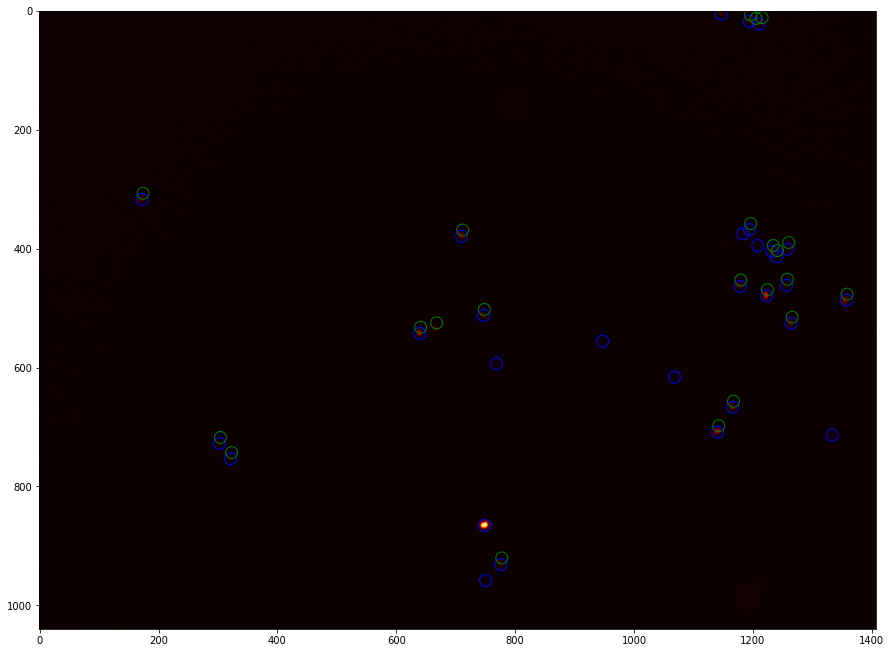

In [138]:
i = 10
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(plt.imread(tif_arr[i-1]), cmap = 'hot')

d_cord = deep_cord[i]
imaris_cord = cord_imaris[i]

for item in d_cord:
    ax.add_patch(plt.Circle((item[0]/1.24,item[1]/1.24), 10, color='b',fill=False))
for item in imaris_cord:
    ax.add_patch(plt.Circle((item[0]/1.24,item[1]/1.24), 10, color='g',fill=False))


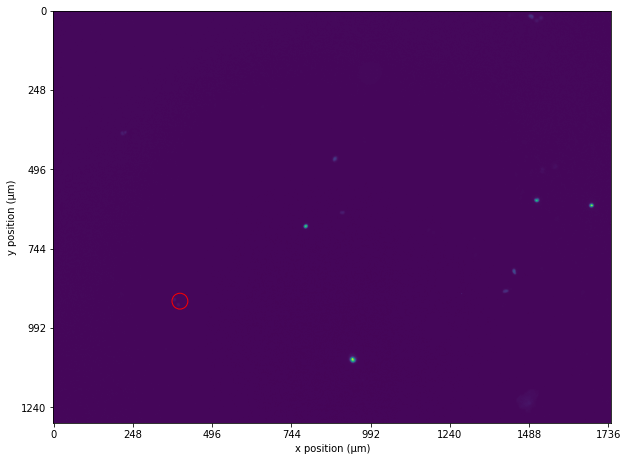

In [18]:
data = plt.imread(tif_arr[5])

pos = [395.1,908.38]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(data)

formatter = lambda x, pos: f'{(x * 1.24):.0f}'
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('x position (μm)')
ax.set_ylabel('y position (μm)')

circle1 = plt.Circle((pos[0]/1.24, pos[1]/1.24), 20, color='r',fill=False)
ax.add_patch(circle1)

plt.show()

<AxesSubplot:>

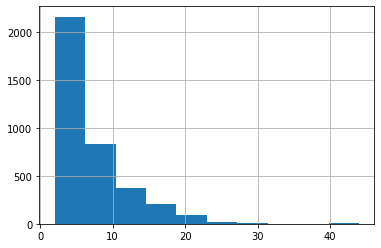

In [19]:
df_imaris.value_counts('Parent').hist()

In [20]:
df_imaris[df_imaris['Parent'] == 1000000003]

,Center of Image Mass X,Center of Image Mass Y,Center of Image Mass Z,Unit,Category,Channel,Collection,Time,Parent,ID
15,394.760010,908.189026,0.62,um,Surface,1,Center of Image Mass,6,1000000003,6
16,401.121002,905.005005,0.62,um,Surface,1,Center of Image Mass,7,1000000003,17
17,400.596008,903.445007,0.62,um,Surface,1,Center of Image Mass,8,1000000003,30
18,400.429993,921.361023,0.62,um,Surface,1,Center of Image Mass,10,1000000003,47
19,401.292999,927.791016,0.62,um,Surface,1,Center of Image Mass,11,1000000003,68
20,399.212006,931.593994,0.62,um,Surface,1,Center of Image Mass,12,1000000003,94
21,378.444000,902.328003,0.62,um,Surface,1,Center of Image Mass,15,1000000003,181
22,371.507996,900.697021,0.62,um,Surface,1,Center of Image Mass,16,1000000003,221
23,364.350006,902.546997,0.62,um,Surface,1,Center of Image Mass,17,1000000003,269
24,368.098999,899.382996,0.62,um,Surface,1,Center of Image Mass,18,1000000003,323


In [21]:
print(pos[0]/1.24, pos[1]/1.24)

318.6290322580645 732.5645161290323


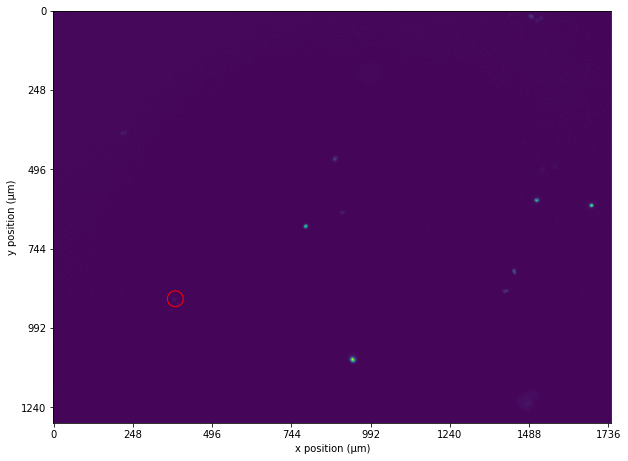

In [22]:
data = plt.imread(tif_arr[5])

pos = [395.1,908.38]
pos =deep_cord[3][-8]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(data)

formatter = lambda x, pos: f'{(x * 1.24):.0f}'
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('x position (μm)')
ax.set_ylabel('y position (μm)')

circle1 = plt.Circle((pos[1], pos[0]), 20, color='r',fill=False)
ax.add_patch(circle1)

plt.show()

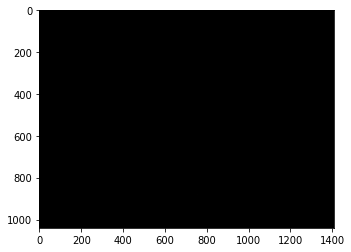

In [30]:
image = cv2.imread('C:\\Projects\\TAU\\DL-Workshop\\Images_Ilan\\JH0011\\TIF\\C-2_MK001_D2_1_2022y05m23d_17h00m.tif')


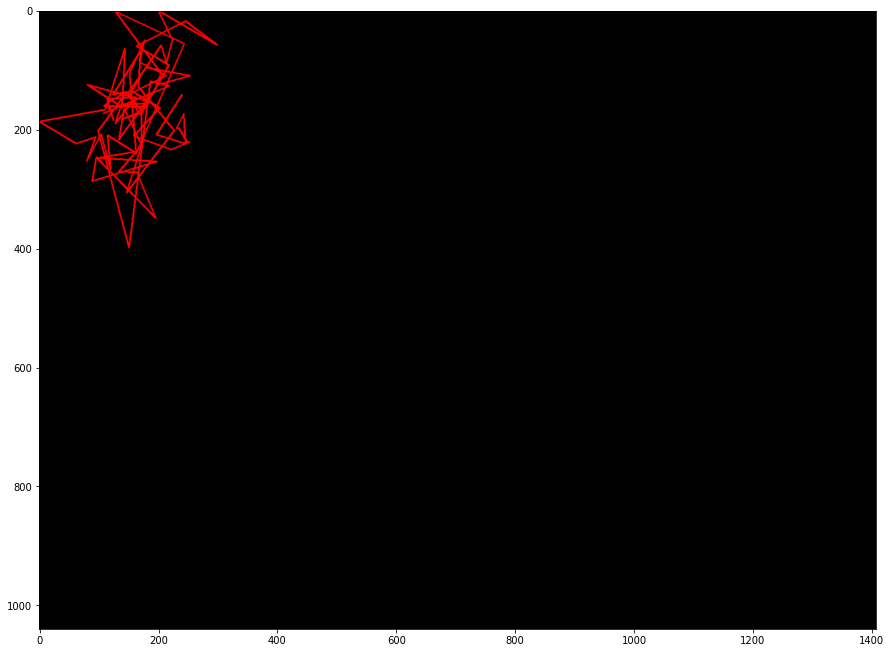

In [42]:
import cv2
import numpy as np
image = cv2.imread('C:\\Projects\\TAU\\DL-Workshop\\Images_Ilan\\JH0011\\TIF\\C-2_MK001_D2_1_2022y05m23d_17h00m.tif')

# List of points
points =list(df_d.loc[25,:].dropna())
# convert to numpy array and reshape
points = np.array(points)
points = [((points - points.min(axis = 0)) * 10)]
points = np.array(points)

points = points.reshape((-1, 1, 2))

# color, thickness and isClosed
color = (255, 0, 0)
thickness = 2
isClosed = False

# drawPolyline
image = cv2.polylines(image, np.int32([points]), isClosed, color, thickness)

fig, ax = plt.subplots(figsize=(15, 15))
# show image
ax.imshow(image, cmap= 'hot')


In [43]:
df_imaris[df_imaris['Parent'] == 1000000003]

,Center of Image Mass X,Center of Image Mass Y,Center of Image Mass Z,Unit,Category,Channel,Collection,Time,Parent,ID
15,394.760010,908.189026,0.62,um,Surface,1,Center of Image Mass,6,1000000003,6
16,401.121002,905.005005,0.62,um,Surface,1,Center of Image Mass,7,1000000003,17
17,400.596008,903.445007,0.62,um,Surface,1,Center of Image Mass,8,1000000003,30
18,400.429993,921.361023,0.62,um,Surface,1,Center of Image Mass,10,1000000003,47
19,401.292999,927.791016,0.62,um,Surface,1,Center of Image Mass,11,1000000003,68
20,399.212006,931.593994,0.62,um,Surface,1,Center of Image Mass,12,1000000003,94
21,378.444000,902.328003,0.62,um,Surface,1,Center of Image Mass,15,1000000003,181
22,371.507996,900.697021,0.62,um,Surface,1,Center of Image Mass,16,1000000003,221
23,364.350006,902.546997,0.62,um,Surface,1,Center of Image Mass,17,1000000003,269
24,368.098999,899.382996,0.62,um,Surface,1,Center of Image Mass,18,1000000003,323


In [45]:
df_imaris[df_imaris['Parent'] == 1000000003][['Center of Image Mass X','Center of Image Mass Y']].to_numpy()

array([[394.76000977, 908.18902588],
       [401.1210022 , 905.00500488],
       [400.5960083 , 903.44500732],
       [400.42999268, 921.36102295],
       [401.29299927, 927.79101562],
       [399.21200562, 931.59399414],
       [378.44400024, 902.32800293],
       [371.50799561, 900.69702148],
       [364.3500061 , 902.54699707],
       [368.09899902, 899.38299561],
       [368.62200928, 900.59698486]])

In [54]:
points = df_imaris[df_imaris['Parent'] == 1000000003][['Center of Image Mass X','Center of Image Mass Y']].to_numpy()
points = points/1.24

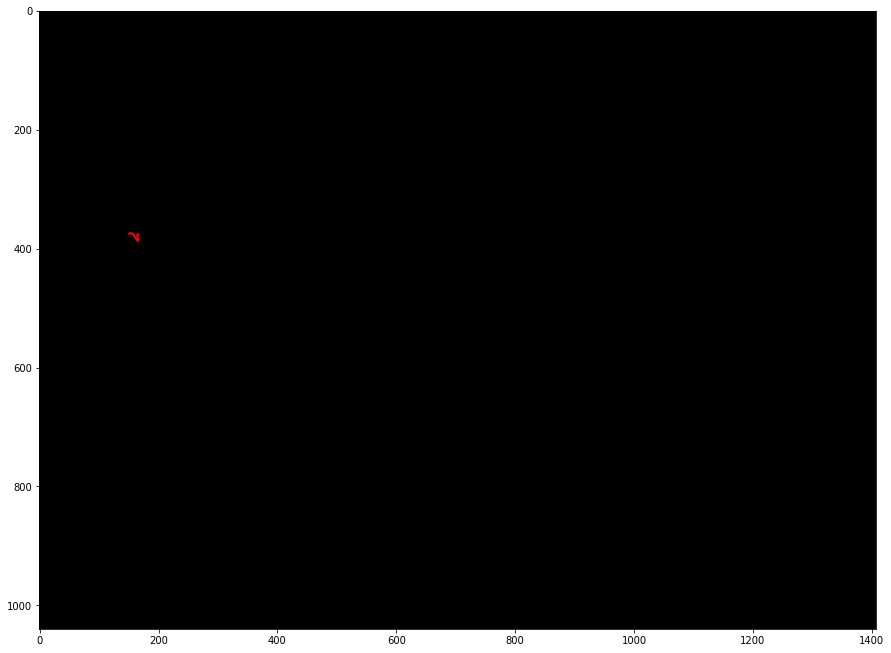

In [59]:
import cv2
import numpy as np
image = cv2.imread('C:\\Projects\\TAU\\DL-Workshop\\Images_Ilan\\JH0011\\TIF\\C-2_MK001_D2_1_2022y05m23d_17h00m.tif')

# List of points
points = df_imaris[df_imaris['Parent'] == 1000000003][['Center of Image Mass X','Center of Image Mass Y']].to_numpy()
points = points/2.4
# convert to numpy array and reshape


points = points.reshape((-1, 1, 2))

# color, thickness and isClosed
color = (255, 0, 0)
thickness = 2
isClosed = False

# drawPolyline
image = cv2.polylines(image, np.int32([points]), isClosed, color, thickness)

fig, ax = plt.subplots(figsize=(15, 15))
# show image
ax.imshow(image, cmap= 'hot')
